In [ ]:
import os
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
# Settings for plots from Methods for Data Science module at Imperial College London
# we define a mix of fontsizes, for different parts of a plot
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

# example of how you can use these fontsizes to set a global configuration for matplotlib;
# you should assign them based on the specific appearance of the figures you are producing
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#setting seeds
seed = 6
random.seed(seed )
torch.manual_seed(seed )
np.random.seed(seed ) 

In [ ]:
import os
import pandas as pd
hyperparameter_summary_file = "hyperparamData/singleFoldfirstRun.csv"
#hyperparameter_summary_file = "hyperparamData/fiveFoldSummary.csv"
models_base_directory = "models"


Checking 902 configurations.
✅ Found: models\h1.l1.p15.b128.hs512.dff2048
✅ Found: models\h1.l1.p15.b128.hs512.dff3072
✅ Found: models\h1.l1.p15.b128.hs512.dff4096
✅ Found: models\h1.l1.p15.b128.hs768.dff2048
✅ Found: models\h1.l1.p15.b128.hs768.dff3072
✅ Found: models\h1.l1.p15.b128.hs768.dff4096
✅ Found: models\h1.l1.p15.b128.hs1024.dff2048
✅ Found: models\h1.l1.p15.b128.hs1024.dff3072
✅ Found: models\h1.l1.p15.b128.hs1024.dff4096
✅ Found: models\h1.l1.p20.b128.hs512.dff2048
✅ Found: models\h1.l1.p20.b128.hs512.dff3072
✅ Found: models\h1.l1.p20.b128.hs512.dff4096
✅ Found: models\h1.l1.p20.b128.hs768.dff2048
✅ Found: models\h1.l1.p20.b128.hs768.dff3072
✅ Found: models\h1.l1.p20.b128.hs768.dff4096
✅ Found: models\h1.l1.p20.b128.hs1024.dff2048
✅ Found: models\h1.l1.p20.b128.hs1024.dff3072
✅ Found: models\h1.l1.p20.b128.hs1024.dff4096
✅ Found: models\h1.l1.p25.b128.hs512.dff2048
✅ Found: models\h1.l1.p25.b128.hs512.dff3072
✅ Found: models\h1.l1.p25.b128.hs512.dff4096
✅ Found: models\h1.l

C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `er

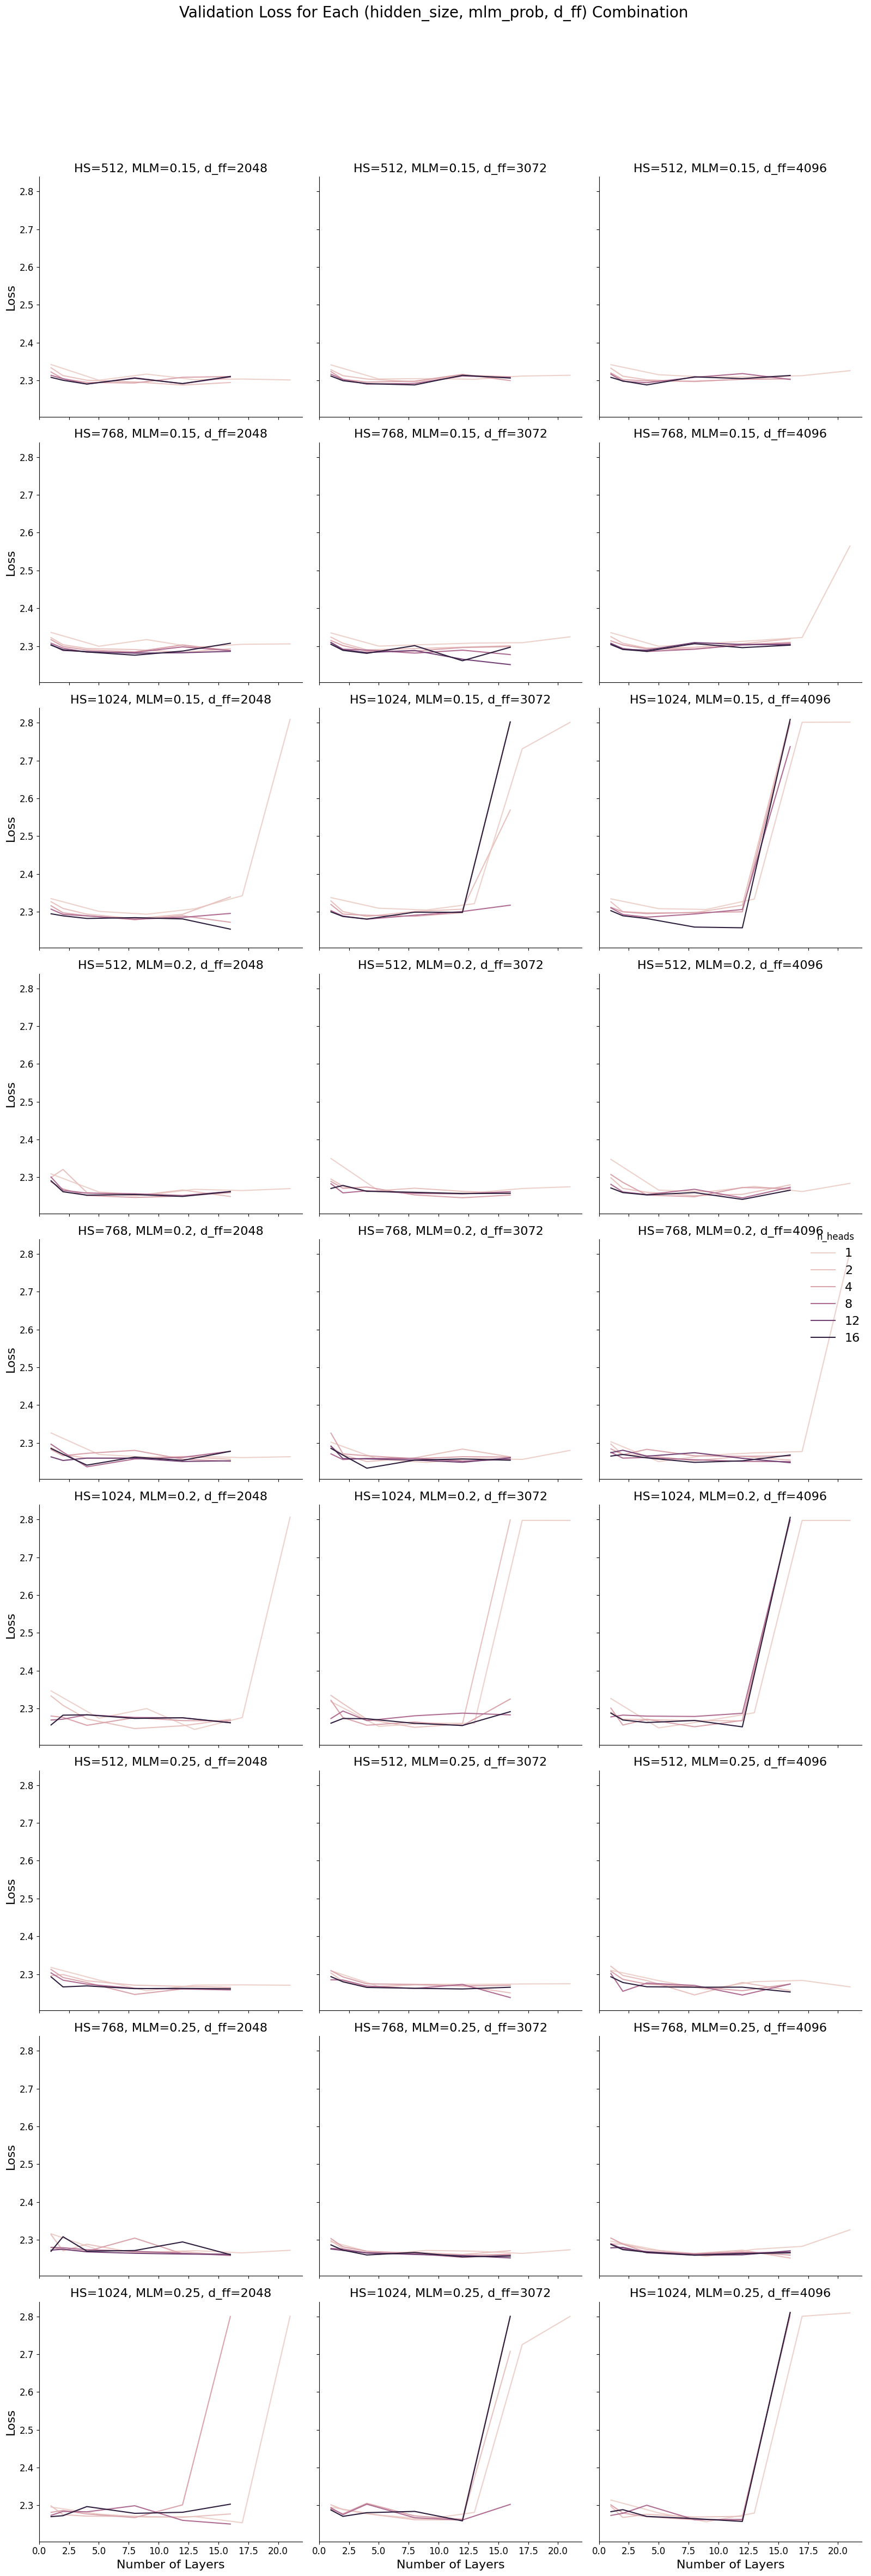

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(hyperparameter_summary_file)

# Melt to long format for plotting
df_long = df.melt(
    id_vars=['n_layers', 'n_heads', 'mlm_prob', 'hidden_size', 'd_ff'],
    value_vars=['best_eval_loss'],
    var_name='loss_type',
    value_name='loss'
)

# Create a single column that uniquely identifies the combination
df_long["combo"] = (
    "HS=" + df_long["hidden_size"].astype(str) +
    ", MLM=" + df_long["mlm_prob"].astype(str) +
    ", d_ff=" + df_long["d_ff"].astype(str)
)

# Plot: one subplot per unique combo
g = sns.relplot(
    data=df_long,
    x="n_layers",
    y="loss",
    hue="n_heads",
    col="combo",
    kind="line",
    markers=True,
    ci=None,             
    col_wrap=3               
)

# Adjust labels and titles
g.set_axis_labels("Number of Layers", "Loss")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Validation Loss for Each (hidden_size, mlm_prob, d_ff) Combination', y=1.05)
plt.tight_layout()
plt.show()


In [114]:
import plotly.express as px
df = pd.read_csv(hyperparameter_summary_file)
custom_colors = [
    [0.0, "#083D77"],
    [0.5, "#9BC995"],
    [0.75, "#FC7753"],
    [1.0, "#9A031E"]
]
df = df.rename(columns={
    "n_layers": "Number of Layers",
    "n_heads": "Number of Heads",
    "mlm_prob": "MLM Probability",
    "hidden_size": "Hidden Size",
    "d_ff": "Feed Forward Dimension",
    "best_eval_loss": "Eval Loss"
})

fig2 = px.parallel_coordinates(
    df,
    color="Eval Loss",
    dimensions=[
        "Number of Layers",
        "Number of Heads",
        "MLM Probability",
        "Hidden Size",
        "Feed Forward Dimension",
        "Eval Loss"
    ],
    color_continuous_scale=custom_colors,
    range_color=[df["Eval Loss"].min(), df["Eval Loss"].max()]
)

# Apply exact same layout/font as first figure
fig2.update_layout(
    autosize=False,
    width=1400,
     height=600,
    margin=dict(l=80, r=60, t=60, b=60),
    plot_bgcolor="white",
    font=dict(family="Arial", size=23, color="black")
)

fig2.show()

In [115]:
df = pd.read_csv(hyperparameter_summary_file)

df = df.rename(columns={
    "n_layers": "Number of Layers",
    "n_heads": "Number of Heads",
    "mlm_prob": "MLM Probability",
    "hidden_size": "Hidden Size",
    "d_ff": "Feed Forward Dimension",
    "best_eval_loss": "Eval Loss"
})

# numeric color: 0 = Other, 1 = Best
best_idx = df["Eval Loss"].idxmin()
df["BestFlag"] = 0
df.loc[best_idx, "BestFlag"] = 1

fig1 = px.parallel_coordinates(
    df,
    color="BestFlag",
    dimensions=[
        "Number of Layers",
        "Number of Heads",
        "MLM Probability",
        "Hidden Size",
        "Feed Forward Dimension",
        "Eval Loss"
    ],
    color_continuous_scale=[[0, "lightgray"], [1,"#9A031E"]],
    range_color=[0, 1]
)

# Hide colorbar and enforce consistent layout/font
fig1.update_layout(
    coloraxis_showscale=False,
    autosize=False,
    width=1400,
     height=600,
    margin=dict(l=80, r=60, t=60, b=60),
    plot_bgcolor="white",
    font=dict(family="Arial", size=23, color="black")
)

fig1.show()


In [116]:

hyperparameter_summary_file = "hyperparamData/fiveFoldSummary.csv"
df = pd.read_csv(hyperparameter_summary_file)

# Drop fixed param and fold
df = df.drop(columns=["batch_size", "fold"])

# Average over folds
df_avg = (
    df.groupby(["n_layers", "n_heads", "mlm_prob", "hidden_size", "d_ff"], as_index=False)
      .mean()
)

# Rename columns for display
df_avg = df_avg.rename(columns={
    "n_layers": "Number of Layers",
    "n_heads": "Number of Heads",
    "mlm_prob": "MLM Probability",
    "hidden_size": "Hidden Size",
    "d_ff": "Feed Forward Dimension",
    "avg_eval_loss": "Average Eval Loss"
})

df_avg["Average Eval Loss"] = df_avg["Average Eval Loss"].round(4)

# Custom color scale
custom_colors = [
    [0.0, "#083D77"],
    [0.5, "#9BC995"],
    [0.75, "#FC7753"],
    [1.0, "#9A031E"]
]

# Parallel coordinates plot with previous sizing/style
fig = px.parallel_coordinates(
    df_avg,
    color="Average Eval Loss",
    dimensions=[
        "Number of Layers",
        "Number of Heads",
        "MLM Probability",
        "Hidden Size",
        "Feed Forward Dimension",
        "Average Eval Loss"
    ],
    color_continuous_scale=custom_colors,
    range_color=[df_avg["Average Eval Loss"].min(), df_avg["Average Eval Loss"].max()]
)

fig.update_layout(
    autosize=False,
    width=1400,
     height=600,
    margin=dict(l=80, r=60, t=60, b=60),
    plot_bgcolor="white",
    font=dict(family="Arial", size=23, color="black")
)

fig.show()

In [117]:
import pandas as pd
import plotly.express as px

hyperparameter_summary_file = "hyperparamData/fiveFoldSummary.csv"
df = pd.read_csv(hyperparameter_summary_file)

# Drop fixed param and fold, then average over folds
df = df.drop(columns=["batch_size", "fold"])
df_avg = df.groupby(["n_layers", "n_heads", "mlm_prob", "hidden_size", "d_ff"], as_index=False).mean()

# Rename columns for display
df_avg = df_avg.rename(columns={
    "n_layers": "Number of Layers",
    "n_heads": "Number of Heads",
    "mlm_prob": "MLM Probability",
    "hidden_size": "Hidden Size",
    "d_ff": "Feed Forward Dimension",
    "avg_eval_loss": "Eval Loss"
})

# Flag best configuration
best_idx = df_avg["Eval Loss"].idxmin()
df_avg["BestFlag"] = 0
df_avg.loc[best_idx, "BestFlag"] = 1

# Parallel coordinates plot highlighting best configuration
fig = px.parallel_coordinates(
    df_avg,
    color="BestFlag",
    dimensions=[
        "Number of Layers",
        "Number of Heads",
        "MLM Probability",
        "Hidden Size",
        "Feed Forward Dimension",
        "Eval Loss"
    ],
    color_continuous_scale=[[0, "lightgray"], [1, "#9A031E"]],
    range_color=[0, 1]
)
# Consistent layout and style
fig.update_layout(
    coloraxis_showscale=False,
    autosize=False,
   width=1400,
     height=600,
    margin=dict(l=80, r=60, t=60, b=60),
    plot_bgcolor="white",
    font=dict(family="Arial", size=23, color="black")
)

fig.show()


In [118]:

hyperparameter_summary_file = "hyperparamData/fiveFoldSummary2.csv"
df = pd.read_csv(hyperparameter_summary_file)

# Drop fixed param and fold
df = df.drop(columns=["batch_size", "fold"])

# Average over folds
df_avg = (
    df.groupby(["n_layers", "n_heads", "mlm_prob", "hidden_size", "d_ff"], as_index=False)
      .mean()
)

# Rename columns for display
df_avg = df_avg.rename(columns={
    "n_layers": "Number of Layers",
    "n_heads": "Number of Heads",
    "mlm_prob": "MLM Probability",
    "hidden_size": "Hidden Size",
    "d_ff": "Feed Forward Dimension",
    "avg_eval_loss": "Average Eval Loss"
})

df_avg["Average Eval Loss"] = df_avg["Average Eval Loss"].round(4)

# Custom color scale
custom_colors = [
    [0.0, "#083D77"],
    [0.5, "#9BC995"],
    [0.75, "#FC7753"],
    [1.0, "#9A031E"]
]

# Parallel coordinates plot with previous sizing/style
fig = px.parallel_coordinates(
    df_avg,
    color="Average Eval Loss",
    dimensions=[
        "Number of Layers",
        "Number of Heads",
        "MLM Probability",
        "Hidden Size",
        "Feed Forward Dimension",
        "Average Eval Loss"
    ],
    color_continuous_scale=custom_colors,
    range_color=[df_avg["Average Eval Loss"].min(), df_avg["Average Eval Loss"].max()]
)

fig.update_layout(
    autosize=False,
    width=1400,
     height=600,
    margin=dict(l=80, r=60, t=60, b=60),
    plot_bgcolor="white",
    font=dict(family="Arial", size=23, color="black")
)

fig.show()

In [119]:
import pandas as pd
import plotly.express as px

hyperparameter_summary_file = "hyperparamData/fiveFoldSummary2.csv"
df = pd.read_csv(hyperparameter_summary_file)

# Drop fixed param and fold, then average over folds
df = df.drop(columns=["batch_size", "fold"])
df_avg = df.groupby(["n_layers", "n_heads", "mlm_prob", "hidden_size", "d_ff"], as_index=False).mean()

# Rename columns for display
df_avg = df_avg.rename(columns={
    "n_layers": "Number of Layers",
    "n_heads": "Number of Heads",
    "mlm_prob": "MLM Probability",
    "hidden_size": "Hidden Size",
    "d_ff": "Feed Forward Dimension",
    "avg_eval_loss": "Eval Loss"
})

# Flag best configuration
best_idx = df_avg["Eval Loss"].idxmin()
df_avg["BestFlag"] = 0
df_avg.loc[best_idx, "BestFlag"] = 1

# Parallel coordinates plot highlighting best configuration
fig = px.parallel_coordinates(
    df_avg,
    color="BestFlag",
    dimensions=[
        "Number of Layers",
        "Number of Heads",
        "MLM Probability",
        "Hidden Size",
        "Feed Forward Dimension",
        "Eval Loss"
    ],
    color_continuous_scale=[[0, "lightgray"], [1, "#9A031E"]],
    range_color=[0, 1]
)

# Consistent layout and style
fig.update_layout(
    coloraxis_showscale=False,
    autosize=False,
    width=1400,
     height=600,
    margin=dict(l=80, r=60, t=60, b=60),
    plot_bgcolor="white",
    font=dict(family="Arial", size=23, color="black")
)

fig.show()
